In [23]:
import cv2
import numpy as np
import os
import statistics
import matplotlib as plt
# Load the resized picture and mask
#picture = cv2.imread(r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Blue_vail")

In [29]:
import cv2
import numpy as np
import os

def measure_blue_veil(image):
    height_picture, width_picture, _ = image.shape
    total_pixels = height_picture * width_picture
    count = 0

    for y in range(height_picture):
        for x in range(width_picture):
            b_picture = float(image[y, x][0])  # Blue channel value
            g_picture = float(image[y, x][1])  # Green channel value
            r_picture = float(image[y, x][2])  # Red channel value

            total = r_picture + g_picture + b_picture

            if b_picture > 60 and (r_picture - 46 < g_picture) and (g_picture < r_picture + 15):
                count += 1
    return count

    #if count > 2900:
        #return 1
    #else:
        #return 0

# Directories containing the pictures
directory1 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/Cancer"
directory2 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/No_cancer"

# Lists to store the results
blue_veil = []
no_blue_veil= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_blue_veil(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, blue_veil)

# Process the second directory
process_directory(directory2, no_blue_veil)

# Print the results
print("Results from directory 1:", blue_veil)
print("Results from directory 2:", no_blue_veil)


Results from directory 1: [4731, 943, 4623, 6015, 1401, 3895, 7070, 13902, 618, 1818, 4023, 165, 12, 5043, 403, 10861, 7558, 1121, 90, 501, 11683, 5335, 7715, 1, 1697, 2588, 142, 1630, 2, 2316, 27, 334, 240, 61, 2, 11046, 23, 1964, 3794, 1028, 1870, 362, 9647, 9474, 2910]
Results from directory 2: [57741, 2563, 30, 228, 237, 3279, 1465, 7722, 12, 3966, 1616, 1537, 928, 6553, 1383, 23, 0, 55, 3967, 11425, 16506, 3483, 1980, 2407, 3648, 22252, 3847, 879, 4214, 18, 3961, 12162, 278, 7792, 2717, 1761, 4, 9046, 3392, 35, 65378, 2544, 87, 2978, 1030]


In [30]:
# Calculate the means
mean_results1 = np.mean(blue_veil)
mean_results2 = np.mean(no_blue_veil)
standart_devresult1 = round(statistics.stdev(blue_veil),2)
print(f"The standart deviation of blue veil is : {standart_devresult1}")
standart_devresult2 = round(statistics.stdev(no_blue_veil),2)
print(f"The standart deviation of no  blue veil is : {standart_devresult2}")
# Round the means to 2 decimal places
rounded_mean_results1 = round(mean_results1, 2)
rounded_mean_results2 = round(mean_results2, 2)


# Print the rounded means
print("Mean of results1 (Blue Veil):", rounded_mean_results1)
print("Mean of results2 (No Blue Veil):", rounded_mean_results2)


The standart deviation of blue veil is : 3805.62
The standart deviation of no  blue veil is : 12945.89
Mean of results1 (Blue Veil): 3348.53
Mean of results2 (No Blue Veil): 6158.42


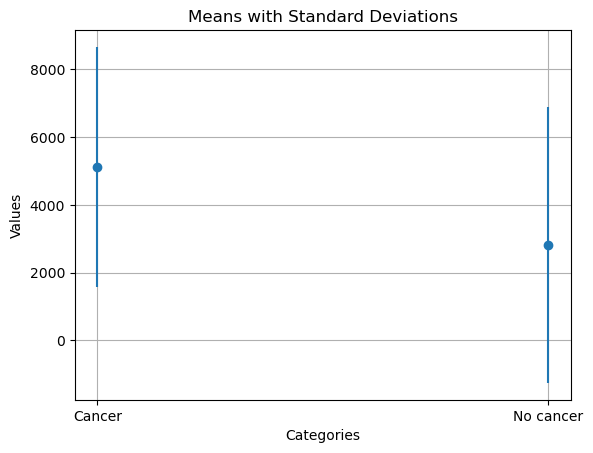

In [32]:
import matplotlib.pyplot as plt

# Data
means = [5121.57, 2824.19]
std_devs = [3537.75, 4076.61]
categories = ['Cancer', 'No cancer']

# Plotting
plt.errorbar(categories, means, yerr=std_devs, fmt='o')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Means with Standard Deviations')
plt.grid(True)

# Display the plot
plt.show()


In [36]:
# Find the minimum value in results1 (blue veil)
min_value_results1 = min(results1)

# Print the minimum value
print("Minimum value in results1 (Blue Veil):", min_value_results1)


Minimum value in results1 (Blue Veil): 165


In [11]:
def measure_pigment_network(image): #feature 1
    
    # Convert the image to the LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract the L, A, and B channels from the LAB image
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply contrast stretching to enhance the L channel
    enhanced_l_channel = cv2.equalizeHist(l_channel)

    # Perform thresholding on the enhanced L channel to obtain a binary mask
    _, binary_mask = cv2.threshold(enhanced_l_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply morphological operations to remove noise and refine the binary mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    morphological_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

    # Convert the morphological mask to a color image
    color_mask = cv2.cvtColor(morphological_mask, cv2.COLOR_GRAY2BGR)

    # Combine the color mask with the original image to highlight the regions of interest
    result = cv2.bitwise_and(image, color_mask)

    # Calculate the percentage of pigment network coverage
    total_pixels = np.prod(binary_mask.shape[:2])
    pigment_pixels = np.count_nonzero(binary_mask)
    coverage_percentage = (pigment_pixels / total_pixels) * 100

    #print("Pigment Network Coverage: {:.2f}%".format(coverage_percentage))
    #if coverage_percentage > 50:
        #return 1
    #else:
        #return 0
    return coverage_percentage

In [ ]:
# Directories containing the pictures

directory3 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/pigment_network"
directory4 = r"C:/Users/45911/Desktop/DS/Semester2/First_year_project/Project2/test_function/no_pigment_network"

# Lists to store the results
pigment_network = []
no_pigment_network= []

# Function to process a directory
def process_directory(directory, results):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a picture
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the picture
            picture_path = os.path.join(directory, filename)
            picture = cv2.imread(picture_path)

            # Process the picture using measure_blue_veil function
            result = measure_blue_veil(picture)

            # Append the result to the list
            results.append(result)

# Process the first directory
process_directory(directory1, blue_veil)

# Process the second directory
process_directory(directory2, no_blue_veil)

# Print the results
print("Results from directory 1:", blue_veil)
print("Results from directory 2:", no_blue_veil)
